# Premières manipulations d'un jeu de données

In [1]:
# Importation des modules
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

# Configurer le style Seaborn
sns.set(style="whitegrid")

In [2]:
# Importation de jeu de donnée
data=pd.read_csv("age_gender.csv",delimiter=";")

In [3]:
# Remplacer les valeurs numériques dans la colonne "genre" par des étiquettes textuelles
data["genre"] = data["genre"].replace([0, 1], ['Homme', 'Femme'])

# Afficher les 5 premières lignes du DataFrame
data.head()

,age,genre
0,1,Homme
1,1,Homme
2,1,Homme
3,1,Homme
4,1,Homme


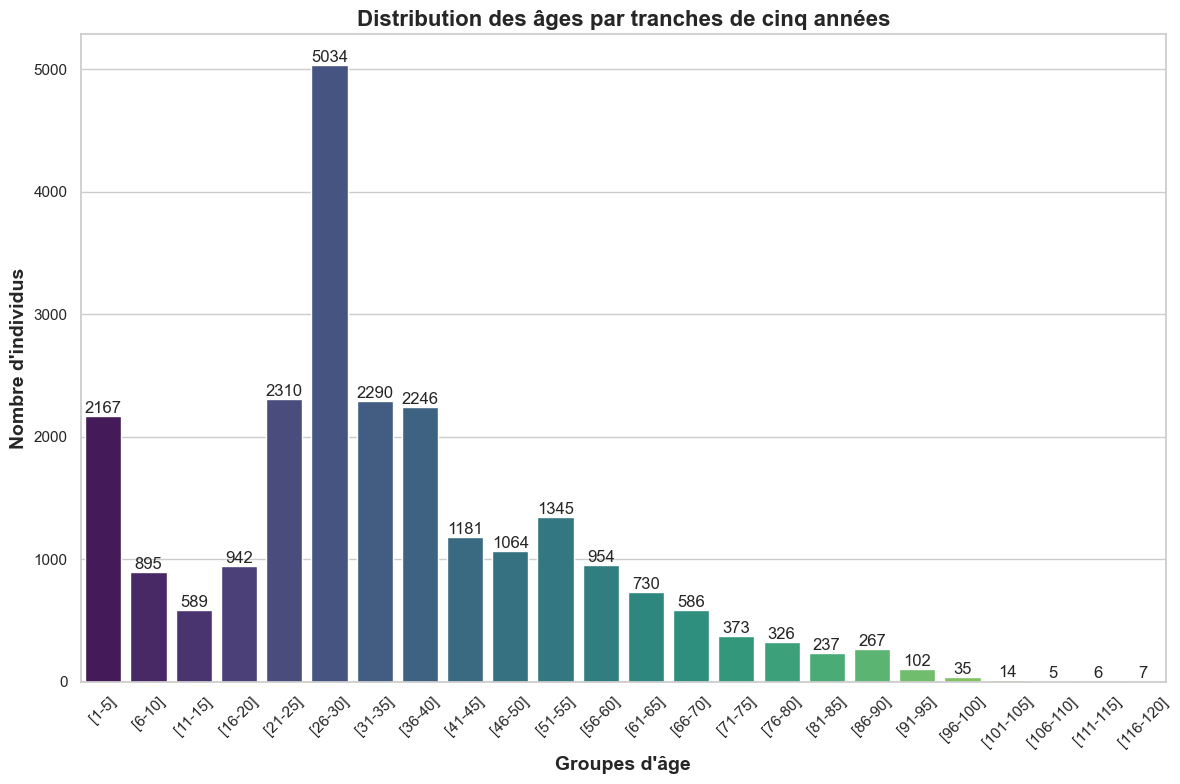

In [4]:
# Ignorer tous les avertissements de type FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Découpage de l'âge en intervalles de 5 ans
max_age = data['age'].max()
bins = range(0, max_age + 5, 5)
labels = [f"[{i+1}-{i+5}]" for i in range(0, max_age, 5)]

# Appliquer la fonction cut sur la colonne 'age'
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Compter le nombre d'individus dans chaque groupe d'âge
age_group_counts = data['age_group'].value_counts().sort_index()


# Tracer la distribution à l'aide de Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")

# Ajouter des annotations
for index, value in enumerate(age_group_counts.values):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Ajouter des labels et un titre
plt.xlabel('Groupes d\'âge', fontsize=14, weight='bold')
plt.ylabel('Nombre d\'individus', fontsize=14, weight='bold')
plt.title('Distribution des âges par tranches de cinq années', fontsize=16, weight='bold')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


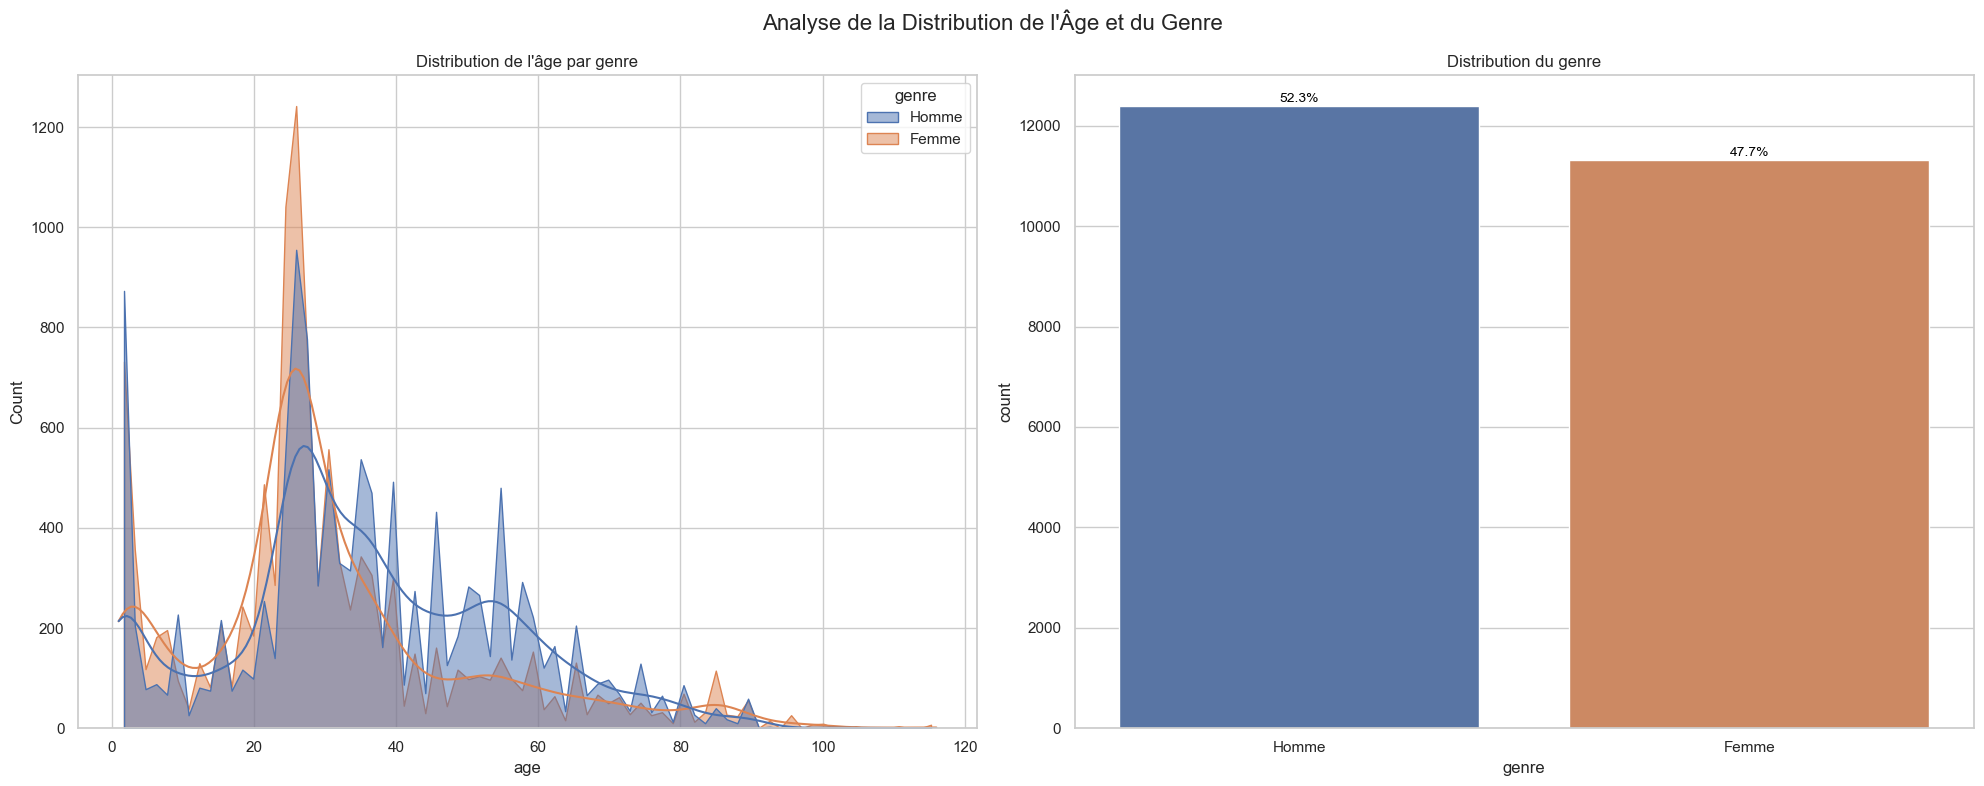

In [5]:
# Créer une figure avec deux subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Distribution de l'âge par genre
sns.histplot(data=data, x='age', hue='genre', element='poly', fill=True, kde=True, ax=axs[0], 
             common_norm=False, alpha=0.5)

axs[0].set_title('Distribution de l\'âge par genre')

# Distribution du genre
sns.countplot(x='genre', data=data, ax=axs[1])
axs[1].set_title('Distribution du genre')

# Calculer les pourcentages et ajouter des annotations
total = len(data)
for p in axs[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs[1].annotate(percentage, (x, y), ha='center', va='center', fontsize=10,
                    color='black', xytext=(0, 5), textcoords='offset points')

# Ajouter un titre à la figure
fig.suptitle('Analyse de la Distribution de l\'Âge et du Genre', fontsize=16)

# Affichage du graphique
plt.tight_layout()
plt.show()


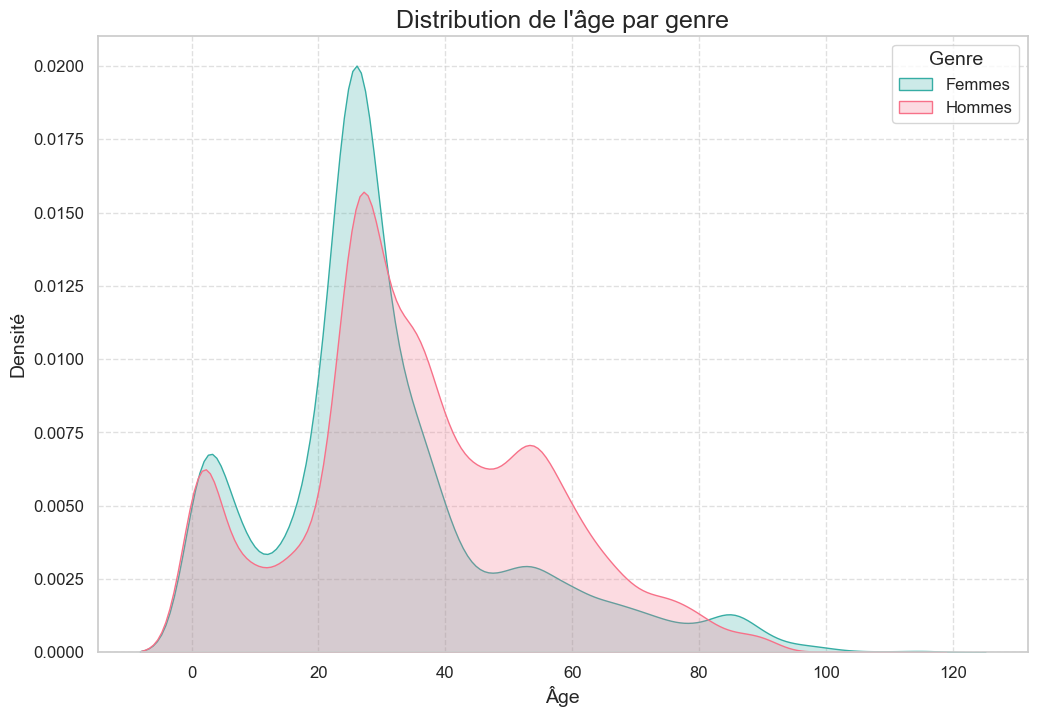

In [6]:
# Configuration de la taille du graphique
plt.figure(figsize=(12, 8))

# Palette de couleurs 
palette = sns.color_palette("husl", 2)

# Tracer les courbes KDE pour chaque genre avec transparence
sns.kdeplot(data=data, x="age", hue="genre", fill=True, palette=palette)

# Ajouter des titres et des labels
plt.title('Distribution de l\'âge par genre', fontsize=18)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Densité', fontsize=14)

# Ajouter une grille pour améliorer la lisibilité
plt.grid(True, linestyle='--', alpha=0.6)

# Amelioré les ticks des axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Placer la légende à un endroit optimal
plt.legend(title='Genre', labels=['Femmes', 'Hommes'], loc='upper right',
           fontsize=12, title_fontsize=14)

# Afficher le graphique
plt.show()


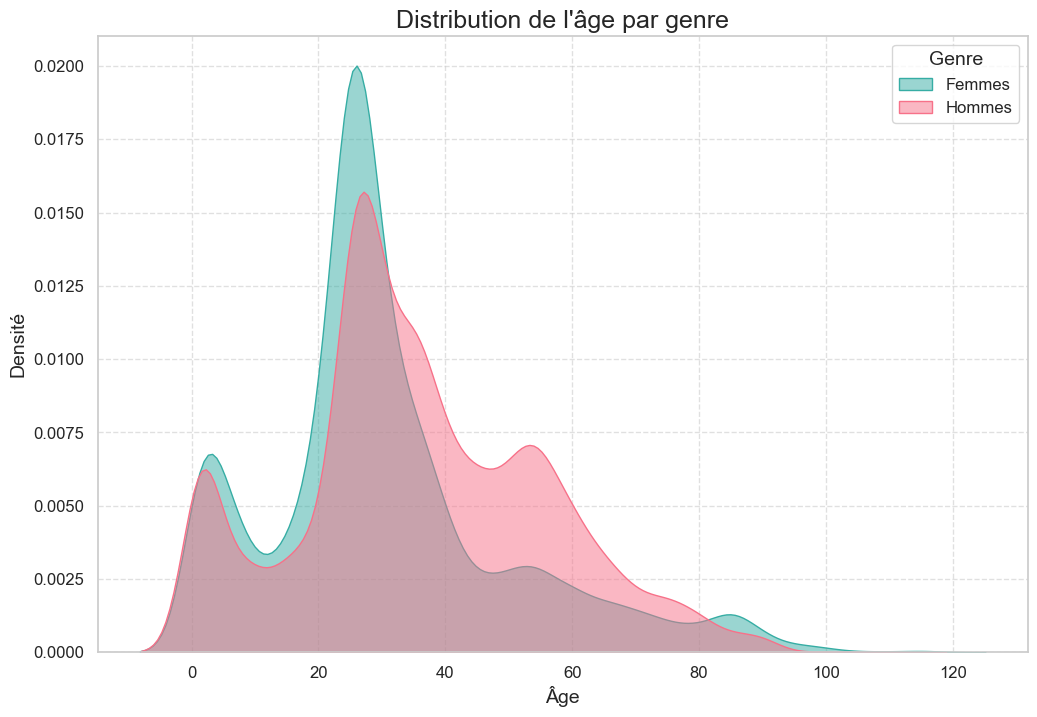

In [7]:
# Configuration de la taille du graphique
plt.figure(figsize=(12, 8))

# Palette de couleurs 
palette = sns.color_palette("husl", 2)

# Tracer les courbes KDE pour chaque genre avec transparence
sns.kdeplot(data=data, x="age", hue="genre", fill=True,alpha=0.5, palette=palette)

# Ajouter des titres et des labels
plt.title('Distribution de l\'âge par genre', fontsize=18)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Densité', fontsize=14)

# Ajouter une grille pour améliorer la lisibilité
plt.grid(True, linestyle='--', alpha=0.6)

# Amelioré les ticks des axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Placer la légende à un endroit optimal
plt.legend(title='Genre', labels=['Femmes', 'Hommes'], loc='upper right', 
           fontsize=12, title_fontsize=14)

# Afficher le graphique
plt.show()


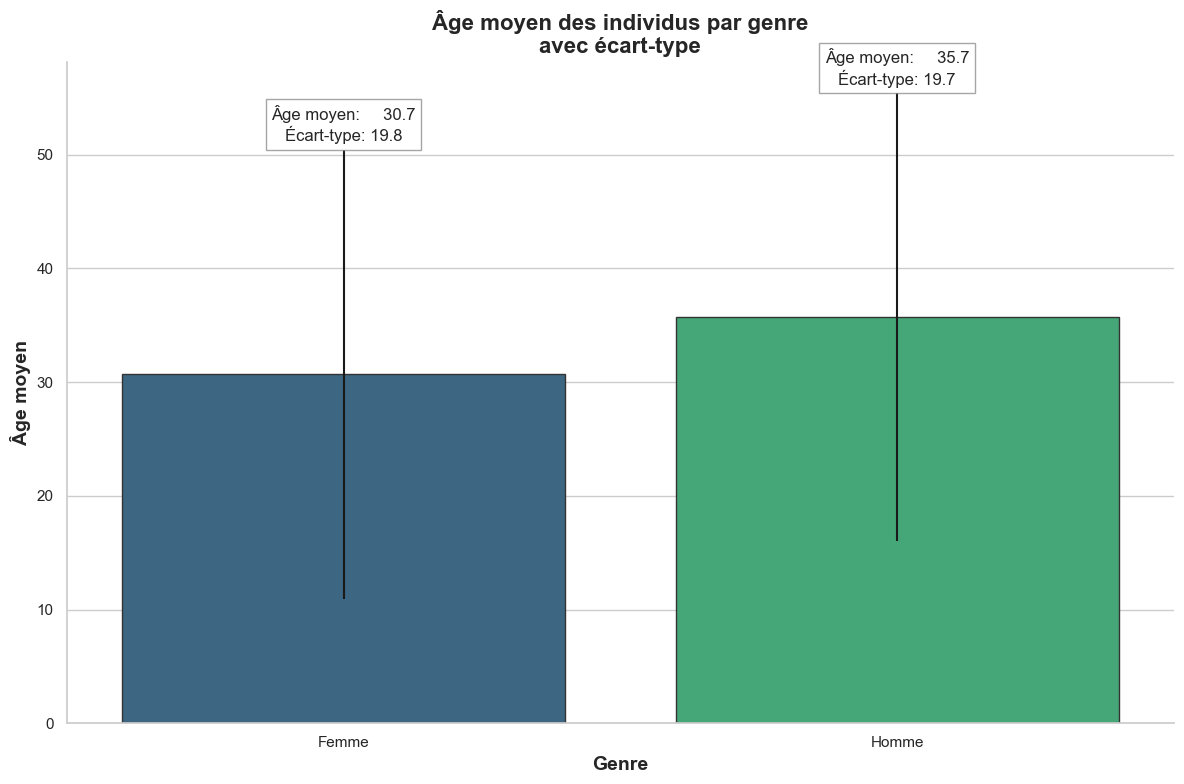

In [8]:
# Configurer le style
sns.set(style="whitegrid")

# Calculer l'âge moyen et l'écart-type pour chaque genre
mean_age = data.groupby('genre')['age'].mean()
std_age = data.groupby('genre')['age'].std()

# Création du barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=mean_age.index, y=mean_age.values,
                      yerr=std_age.values, capsize=0.2, palette="viridis", edgecolor=".2")

# Ajouter des labels et un titre
plt.xlabel('Genre', fontsize=14, weight='bold')
plt.ylabel('Âge moyen', fontsize=14, weight='bold')
# titre
plt.title('Âge moyen des individus par genre\navec écart-type', fontsize=16, weight='bold') 

# Affichage des statistiques
for i, (index, row) in enumerate(mean_age.items()):
    barplot.text(i, row + std_age[index] + 0.5, f"Âge moyen: \
    {row:.1f}\nÉcart-type: {std_age[index]:.1f}", 
                 ha='center', va='bottom', fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Améliorer les axes
barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)

# Affichage du graphique avec annotations
plt.tight_layout()
plt.show()
